# load the dataset 

In [3]:
import pandas as pd 

path = './e-commerce-sales-and-customer-insights-dataset-2.csv'


sales_dataframe = pd.read_csv(path)
sales_dataframe

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
0,CUST0268,Male,North,47.0,Monitor,Electronics,300.0,5,1500,13.31,Returned,12/8/2023
1,CUST0046,Male,West,22.0,Headphones,Accessories,100.0,2,200,6.93,In Transit,4/9/2023
2,CUST0169,Female,South,54.0,Monitor,Electronics,300.0,1,300,11.31,Returned,8/28/2023
3,CUST0002,Male,North,23.0,Headphones,Accessories,100.0,5,500,12.22,Delivered,1/18/2023
4,CUST0173,Female,South,47.0,Laptop,Electronics,1500.0,3,4500,5.40,Delivered,1/19/2023
...,...,...,...,...,...,...,...,...,...,...,...,...
995,CUST0201,Female,South,49.0,Headphones,Accessories,100.0,1,100,17.21,In Transit,1/5/2023
996,CUST0133,Male,East,47.0,Laptop,Electronics,1500.0,1,1500,19.19,Delivered,4/1/2023
997,CUST0055,Female,North,29.0,Mouse,Accessories,30.0,5,150,19.35,Delivered,10/20/2023
998,CUST0023,Female,South,29.0,Laptop,Electronics,1500.0,5,7500,10.36,Returned,1/7/2023


In [4]:
sales_dataframe["Order Date"] = pd.to_datetime(sales_dataframe["Order Date"], errors="coerce")
sales_dataframe['Order Date']

0     2023-12-08
1     2023-04-09
2     2023-08-28
3     2023-01-18
4     2023-01-19
         ...    
995   2023-01-05
996   2023-04-01
997   2023-10-20
998   2023-01-07
999   2023-01-30
Name: Order Date, Length: 1000, dtype: datetime64[ns]

## converting date into a stadard format 

In [5]:

number_of_nulls = sales_dataframe.isnull().sum()
number_of_nulls

Customer ID        0
Gender             0
Region             0
Age                0
Product Name       0
Category           0
Unit Price         0
Quantity           0
Total Price        0
Shipping Fee       0
Shipping Status    0
Order Date         0
dtype: int64

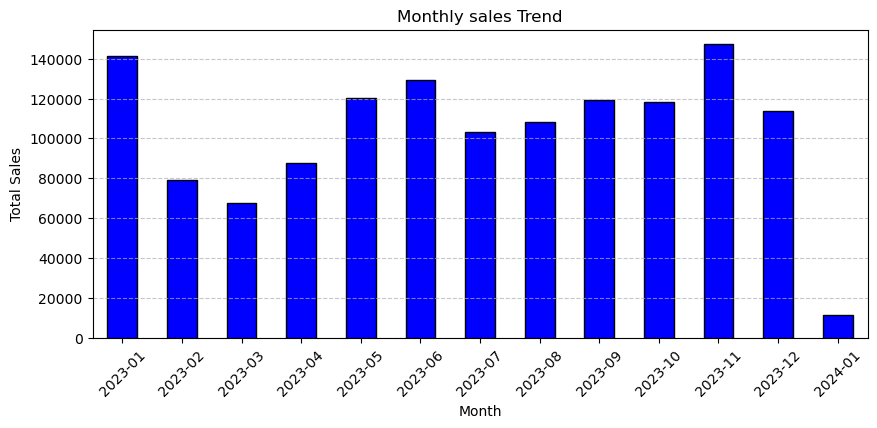

In [13]:
import matplotlib.pyplot as plt

# Extract month and year for groupingb
sales_dataframe["Month"] = sales_dataframe["Order Date"].dt.to_period("M")

# Group by months
monthly_sales = sales_dataframe.groupby("Month")["Total Price"].sum()

# Plot bar chart
plt.figure(figsize=(10, 4))
monthly_sales.plot(kind="bar", color="blue", edgecolor="black")

# Customize labels and title
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly sales Trend")
plt.xticks(rotation=45)  #
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [7]:
sales_dataframe


,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date,Month
0,CUST0268,Male,North,47.0,Monitor,Electronics,300.0,5,1500,13.31,Returned,2023-12-08,2023-12
1,CUST0046,Male,West,22.0,Headphones,Accessories,100.0,2,200,6.93,In Transit,2023-04-09,2023-04
2,CUST0169,Female,South,54.0,Monitor,Electronics,300.0,1,300,11.31,Returned,2023-08-28,2023-08
3,CUST0002,Male,North,23.0,Headphones,Accessories,100.0,5,500,12.22,Delivered,2023-01-18,2023-01
4,CUST0173,Female,South,47.0,Laptop,Electronics,1500.0,3,4500,5.40,Delivered,2023-01-19,2023-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CUST0201,Female,South,49.0,Headphones,Accessories,100.0,1,100,17.21,In Transit,2023-01-05,2023-01
996,CUST0133,Male,East,47.0,Laptop,Electronics,1500.0,1,1500,19.19,Delivered,2023-04-01,2023-04
997,CUST0055,Female,North,29.0,Mouse,Accessories,30.0,5,150,19.35,Delivered,2023-10-20,2023-10
998,CUST0023,Female,South,29.0,Laptop,Electronics,1500.0,5,7500,10.36,Returned,2023-01-07,2023-01


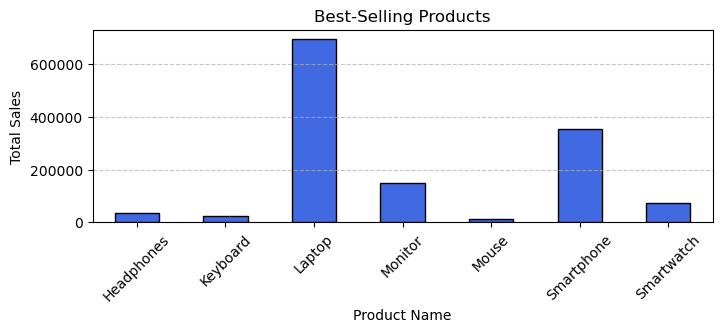

In [19]:
import matplotlib.pyplot as plt

# Group sales by product and get top 10
top_products = sales_dataframe.groupby("Product Name")["Total Price"].sum()
plt.figure(figsize=(8,2.5))
top_products.plot(kind="bar", color="royalblue", edgecolor="black")

# Customize labels and title
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.title("Best-Selling Products")
plt.xticks(rotation=45)  
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


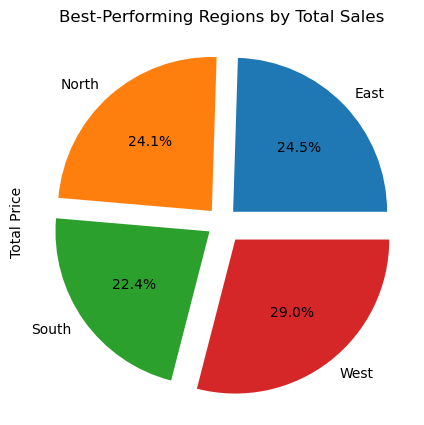

In [9]:
# Group sales by region
region_sales = sales_dataframe.groupby("Region")["Total Price"].sum()

explode_values = (0.1, 0.1, 0.1, 0.14)

# Plot bar chart
plt.figure(figsize=(10,5))
region_sales.plot(kind="pie",labels=region_sales.index, autopct="%1.1f%%", explode =explode_values )

plt.title("Best-Performing Regions by Total Sales")


# Show the plot
plt.show()


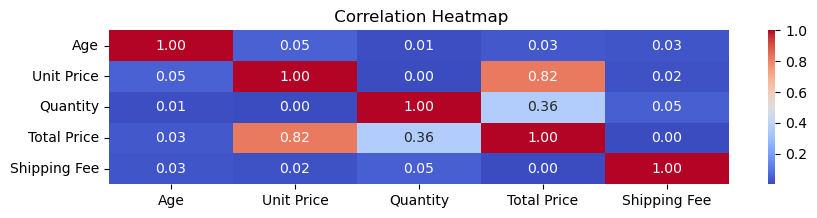

In [21]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(10,2))
sns.heatmap(sales_dataframe.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title(" Correlation Heatmap")
plt.show()


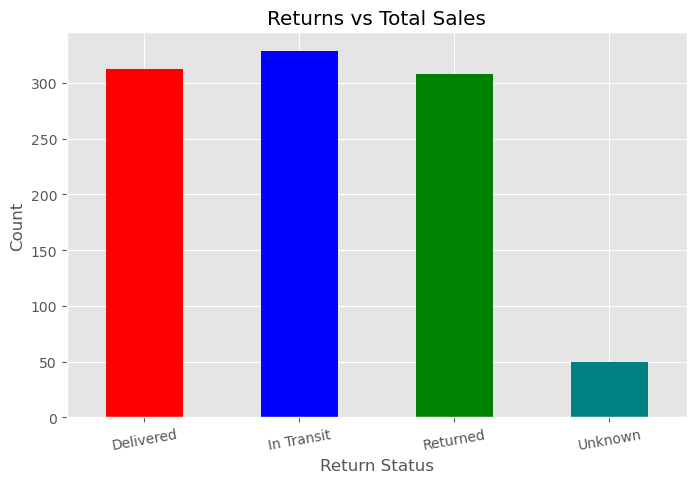

In [25]:
return_counts = sales_dataframe.groupby("Shipping Status")["Total Price"].count()
plt.style.use("ggplot")
return_counts.plot(kind="bar", color = ['red', 'blue', 'green', 'teal'], figsize=(8,5))
plt.title("Returns vs Total Sales")
plt.xlabel("Return Status")
plt.ylabel("Count")
plt.xticks(rotation=10)
plt.show()


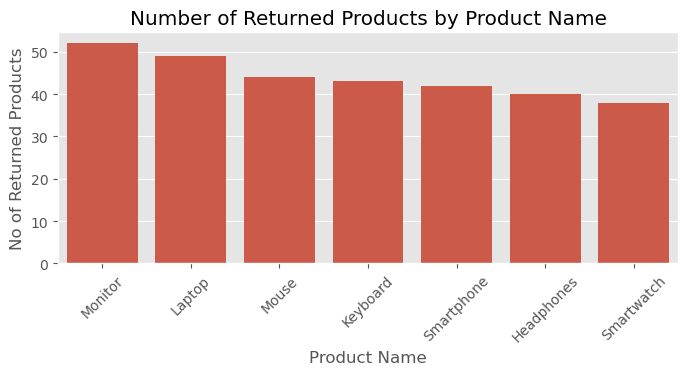

In [32]:
# Filter dataset for returned products
returned_products = sales_dataframe[sales_dataframe["Shipping Status"] == "Returned"]

# Count the number of returns per region
returns_by_region = returned_products["Product Name"].value_counts()

# Plot bar chart
plt.figure(figsize=(8,3))
sns.barplot(x=returns_by_region.index, y=returns_by_region.values)

# Add labels and title
plt.xlabel("Product Name")
plt.ylabel("No of Returned Products")
plt.title("Number of Returned Products by Product Name")
plt.xticks(rotation=45)  # Rotate labels for better visibility

# Show plot
plt.show()
